In [1]:
## Importing all the necessray libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import joblib
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

In [2]:
## Defining the folder paths
data_path = '../Data/'
model_path = '../Model/'
transformation_path = '../Transformation/'
visualisation_path = '../Visualisation/'
notebook_path = '../Notebook/'
output_path = '../Output/'

In [3]:
os.getcwd()

'C:\\Users\\mosakue\\Desktop\\PYTHON_CLASS_MATERIALS\\FLOOD_ML_PROJECT\\Notebook'

In [4]:
os.chdir(data_path)
os.getcwd()

'C:\\Users\\mosakue\\Desktop\\PYTHON_CLASS_MATERIALS\\FLOOD_ML_PROJECT\\Data'

In [5]:
flood_data = pd.read_csv('flood.csv')
flood_data.head()

,Sl,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood?
0,0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01,NaN
1,1,Barisal,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.7,90.36,4,1949.02,NaN
2,2,Barisal,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.7,90.36,4,1949.03,NaN
3,3,Barisal,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.7,90.36,4,1949.04,NaN
4,4,Barisal,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1949.05,NaN


Pre-processing the data

In [6]:
flood_data.shape

(20544, 19)

In [7]:
flood_data.describe()

,Sl,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood?
count,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,4493.000000
mean,10271.500000,1985.332944,6.500000,33.450739,21.166872,198.776621,79.497375,1.415049,3.485827,6.419056,41935.098131,549703.189176,579280.955958,23.326647,90.493193,13.357477,1985.397944,0.919653
std,5930.686301,17.610799,3.452137,2.956401,4.949587,240.693197,7.667925,1.042454,2.083791,1.747959,36.516932,116032.076255,130616.053201,1.155241,1.108720,13.529530,17.610832,0.271860
min,0.000000,1948.000000,1.000000,21.600000,6.200000,0.000000,34.000000,0.000000,0.000000,0.000000,41859.000000,0.000000,0.000000,20.870000,88.560000,0.000000,1948.010000,0.000000
25%,5135.750000,1972.000000,3.750000,31.700000,16.900000,8.000000,75.000000,0.700000,1.600000,4.965517,41909.000000,435303.700000,504500.300000,22.640000,89.550000,4.000000,1972.050000,1.000000
50%,10271.500000,1987.000000,6.500000,33.900000,23.400000,111.000000,81.000000,1.200000,3.300000,6.800000,41941.000000,540098.600000,561770.300000,23.170000,90.410000,7.000000,1987.040000,1.000000
75%,15407.250000,2000.000000,9.250000,35.400000,25.400000,312.000000,85.000000,1.900000,5.500000,7.800000,41963.000000,650012.100000,687095.900000,24.290000,91.460000,19.000000,2000.092500,1.000000
max,20543.000000,2013.000000,12.000000,44.000000,28.100000,2072.000000,97.000000,11.200000,7.900000,11.000000,41998.000000,734765.400000,844822.300000,25.720000,92.260000,63.000000,2013.120000,1.000000


In [8]:
flood_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20544 entries, 0 to 20543
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sl                 20544 non-null  int64  
 1   Station_Names      20544 non-null  object 
 2   Year               20544 non-null  int64  
 3   Month              20544 non-null  int64  
 4   Max_Temp           20544 non-null  float64
 5   Min_Temp           20544 non-null  float64
 6   Rainfall           20544 non-null  float64
 7   Relative_Humidity  20544 non-null  float64
 8   Wind_Speed         20544 non-null  float64
 9   Cloud_Coverage     20544 non-null  float64
 10  Bright_Sunshine    20544 non-null  float64
 11  Station_Number     20544 non-null  int64  
 12  X_COR              20544 non-null  float64
 13  Y_COR              20544 non-null  float64
 14  LATITUDE           20544 non-null  float64
 15  LONGITUDE          20544 non-null  float64
 16  ALT                205

In [9]:
flood_data.duplicated().sum()

0

In [10]:
flood_data.isnull().sum()

Sl                       0
Station_Names            0
Year                     0
Month                    0
Max_Temp                 0
Min_Temp                 0
Rainfall                 0
Relative_Humidity        0
Wind_Speed               0
Cloud_Coverage           0
Bright_Sunshine          0
Station_Number           0
X_COR                    0
Y_COR                    0
LATITUDE                 0
LONGITUDE                0
ALT                      0
Period                   0
Flood?               16051
dtype: int64

In [11]:
## Dropping the SI column because it is unnecessary

flood_data.drop('Sl', axis=1, inplace=True)
flood_data.head()

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood?
0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01,NaN
1,Barisal,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.7,90.36,4,1949.02,NaN
2,Barisal,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.7,90.36,4,1949.03,NaN
3,Barisal,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.7,90.36,4,1949.04,NaN
4,Barisal,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1949.05,NaN


In [12]:
flood_data.rename(columns={'Flood?':'Flood'}, inplace=True)
flood_data.head()

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood
0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01,NaN
1,Barisal,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.7,90.36,4,1949.02,NaN
2,Barisal,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.7,90.36,4,1949.03,NaN
3,Barisal,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.7,90.36,4,1949.04,NaN
4,Barisal,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1949.05,NaN


In [13]:
flood_data.Flood.unique()

array([nan,  1.,  0.])

In [14]:
flood_data.Flood.value_counts()

Flood
1.0    4132
0.0     361
Name: count, dtype: int64

In [15]:
flood_data.Flood.isnull().sum()

16051

In [16]:
flood_data.Station_Names.nunique()

33

TREATING MISSING VALUES

In [17]:
## SPLITTING THE DATASET INTO TWO BASED ON MISSING AND NON MISSING

Selecting the dataframe with NAN

In [18]:
flood_NAN = flood_data[flood_data['Flood'].isna()]
flood_NAN.head()

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood
0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01,NaN
1,Barisal,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.7,90.36,4,1949.02,NaN
2,Barisal,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.7,90.36,4,1949.03,NaN
3,Barisal,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.7,90.36,4,1949.04,NaN
4,Barisal,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1949.05,NaN


Select dataset without NAN

Dataset without NAN

In [19]:
flood_no_NAN = flood_data[flood_data['Flood'] >= 0]
flood_no_NAN.head()

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood
5,Barisal,1949,6,34.4,25.7,512.0,80.0,1.631481,5.6,4.072340,41950,536809.8,510151.9,22.7,90.36,4,1949.06,1.0
6,Barisal,1949,7,33.4,25.8,575.0,85.0,1.570370,5.4,3.738298,41950,536809.8,510151.9,22.7,90.36,4,1949.07,1.0
7,Barisal,1949,8,33.5,25.7,349.0,86.0,1.329630,5.6,4.272340,41950,536809.8,510151.9,22.7,90.36,4,1949.08,1.0
16,Barisal,1950,5,36.1,25.5,87.0,78.0,1.703704,4.8,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1950.05,1.0
17,Barisal,1950,6,33.9,26.0,476.0,87.0,1.631481,7.2,4.072340,41950,536809.8,510151.9,22.7,90.36,4,1950.06,1.0


## EXPLORING THE DATASET WITH PLOTS

<Axes: ylabel='Density'>

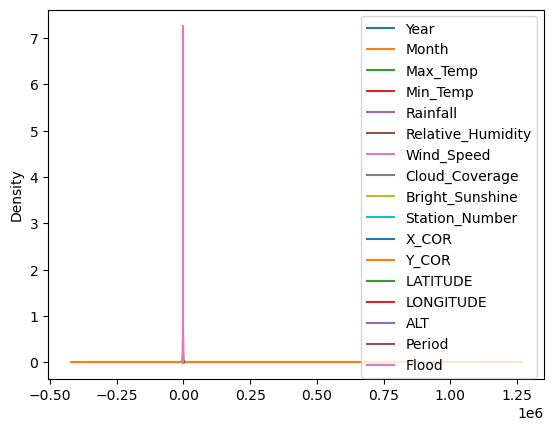

In [20]:
flood_data.plot(kind= 'density')

C:\Users\mosakue\AppData\Local\Temp\ipykernel_31800\1256434294.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(flood_data['Rainfall'])


<Axes: xlabel='Rainfall', ylabel='Density'>

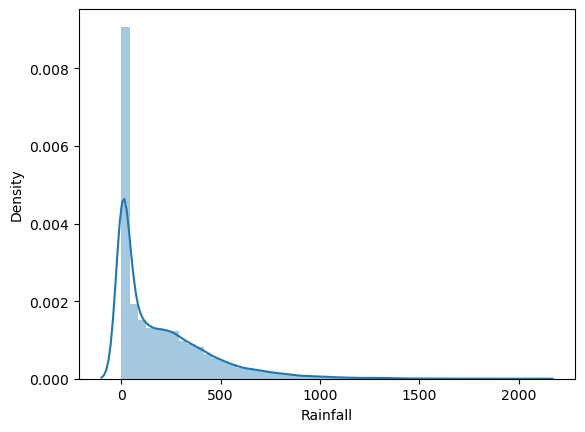

In [21]:
sb.distplot(flood_data['Rainfall'])

C:\Users\mosakue\AppData\Local\Temp\ipykernel_31800\123314959.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(flood_data['Rainfall'], kde = False, bins = 20)


<Axes: xlabel='Rainfall'>

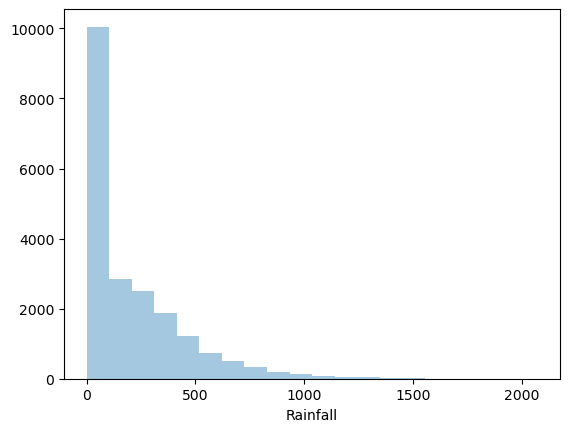

In [22]:
sb.distplot(flood_data['Rainfall'], kde = False, bins = 20)

C:\Users\mosakue\AppData\Local\Temp\ipykernel_31800\3953743944.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(flood_data['Rainfall'], kde = False, bins = 30)


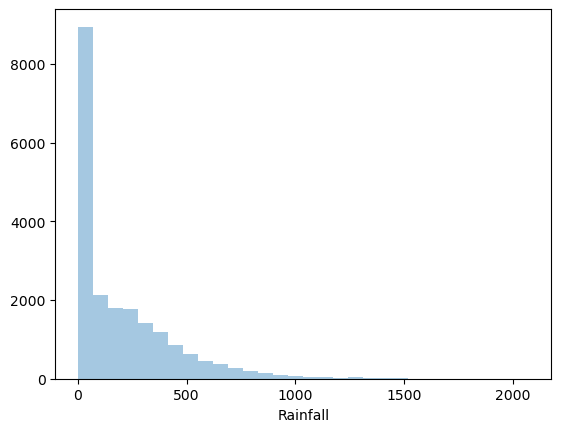

In [23]:
sb.distplot(flood_data['Rainfall'], kde = False, bins = 30)

%matplotlib inline

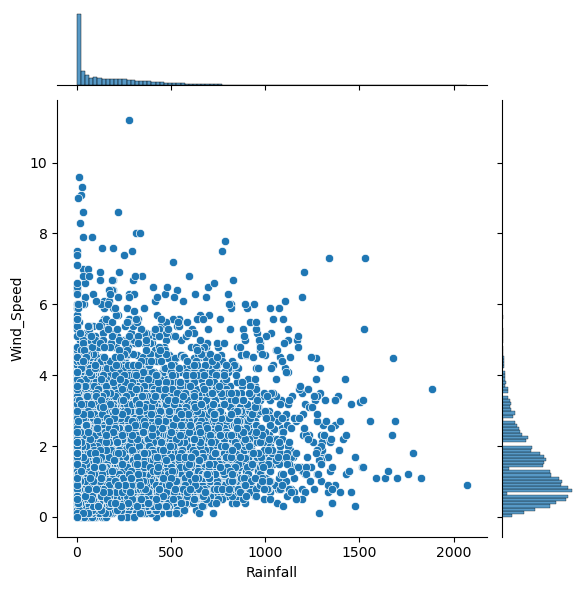

In [24]:
sb.jointplot(x = 'Rainfall', y = 'Wind_Speed', data = flood_data, kind = 'scatter')

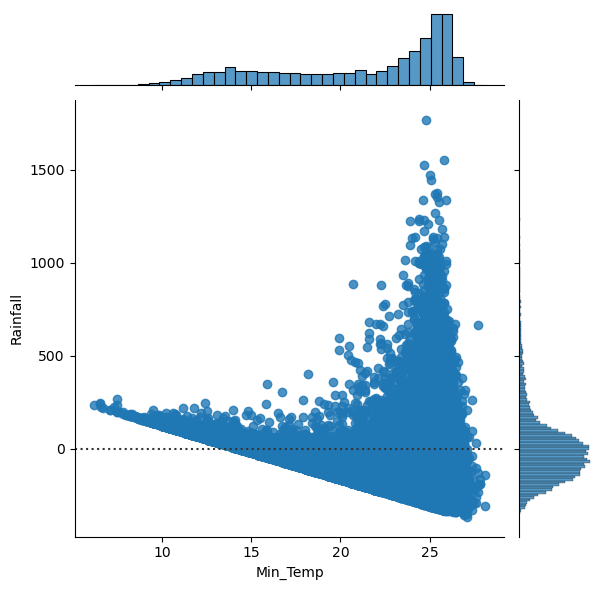

In [25]:
sb.jointplot(x = 'Min_Temp', y = 'Rainfall', data = flood_data, kind = 'resid')

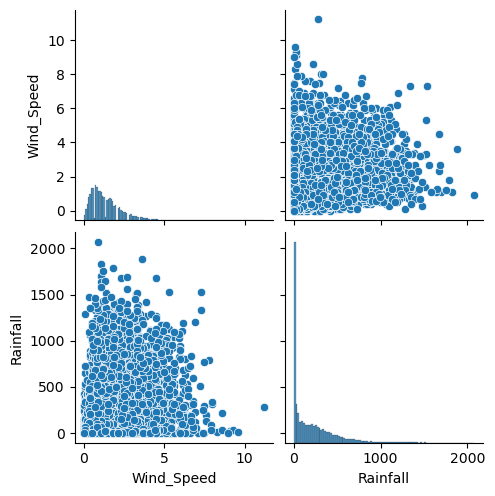

In [26]:
sb.pairplot(flood_data[['Wind_Speed', 'Rainfall']])

### Building a model using the dataset without NAN to predict the NAN in the dataset with NAN

In [27]:
flood_no_NAN.head()

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood
5,Barisal,1949,6,34.4,25.7,512.0,80.0,1.631481,5.6,4.072340,41950,536809.8,510151.9,22.7,90.36,4,1949.06,1.0
6,Barisal,1949,7,33.4,25.8,575.0,85.0,1.570370,5.4,3.738298,41950,536809.8,510151.9,22.7,90.36,4,1949.07,1.0
7,Barisal,1949,8,33.5,25.7,349.0,86.0,1.329630,5.6,4.272340,41950,536809.8,510151.9,22.7,90.36,4,1949.08,1.0
16,Barisal,1950,5,36.1,25.5,87.0,78.0,1.703704,4.8,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1950.05,1.0
17,Barisal,1950,6,33.9,26.0,476.0,87.0,1.631481,7.2,4.072340,41950,536809.8,510151.9,22.7,90.36,4,1950.06,1.0


Selecting Numerical Columns

In [28]:
flood_no_NAN.columns

Index(['Station_Names', 'Year', 'Month', 'Max_Temp', 'Min_Temp', 'Rainfall',
       'Relative_Humidity', 'Wind_Speed', 'Cloud_Coverage', 'Bright_Sunshine',
       'Station_Number', 'X_COR', 'Y_COR', 'LATITUDE', 'LONGITUDE', 'ALT',
       'Period', 'Flood'],
      dtype='object')

In [29]:
num_cols = ['Year', 'Month', 'Max_Temp', 'Min_Temp', 'Rainfall',
       'Relative_Humidity', 'Wind_Speed', 'Cloud_Coverage', 'Bright_Sunshine',
       'Station_Number', 'X_COR', 'Y_COR', 'LATITUDE', 'LONGITUDE', 'ALT',
       'Period']

In [152]:
num_data_no_NAN = flood_no_NAN[['Year', 'Month', 'Max_Temp', 'Min_Temp', 'Rainfall',
       'Relative_Humidity', 'Wind_Speed', 'Cloud_Coverage', 'Bright_Sunshine',
       'Station_Number', 'X_COR', 'Y_COR', 'LATITUDE', 'LONGITUDE', 'ALT',
       'Period']]

num_data_no_NAN.head()

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
5,1949,6,34.4,25.7,512.0,80.0,1.631481,5.6,4.072340,41950,536809.8,510151.9,22.7,90.36,4,1949.06
6,1949,7,33.4,25.8,575.0,85.0,1.570370,5.4,3.738298,41950,536809.8,510151.9,22.7,90.36,4,1949.07
7,1949,8,33.5,25.7,349.0,86.0,1.329630,5.6,4.272340,41950,536809.8,510151.9,22.7,90.36,4,1949.08
16,1950,5,36.1,25.5,87.0,78.0,1.703704,4.8,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1950.05
17,1950,6,33.9,26.0,476.0,87.0,1.631481,7.2,4.072340,41950,536809.8,510151.9,22.7,90.36,4,1950.06


<Axes: >

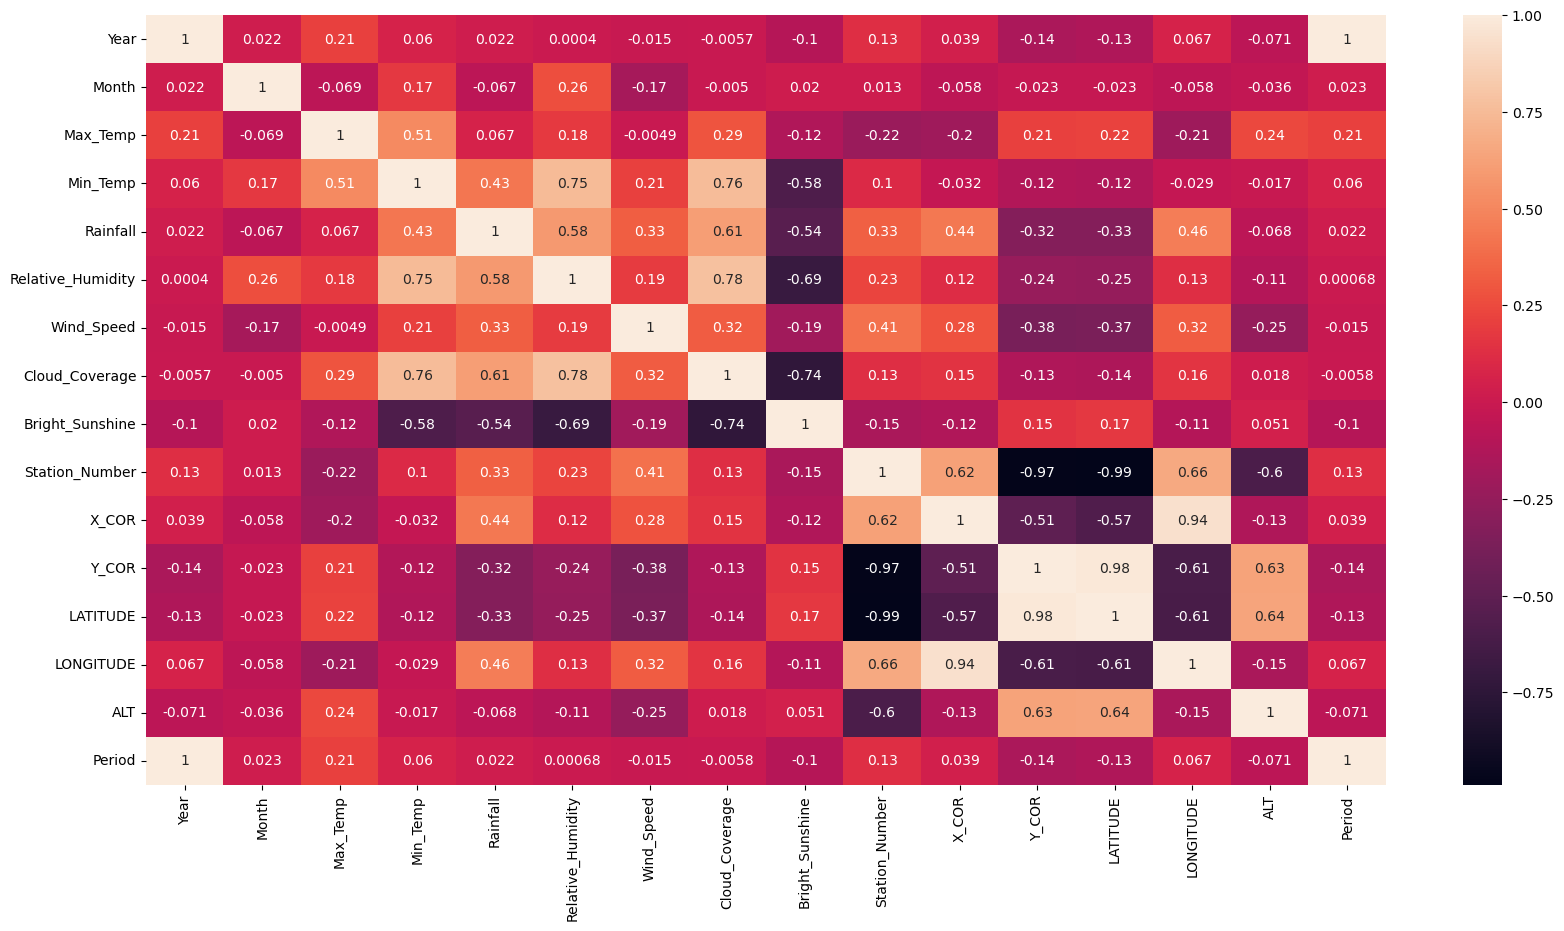

In [31]:
plt.figure(figsize=(20,10))

sb.heatmap(num_data_no_NAN.corr(), annot=True)

In [32]:
cat_data_no_NAN = flood_no_NAN[['Station_Names']]
cat_data_no_NAN.head()

,Station_Names
5,Barisal
6,Barisal
7,Barisal
16,Barisal
17,Barisal


In [33]:
target_data = flood_no_NAN[['Flood']]
target_data.head()

,Flood
5,1.0
6,1.0
7,1.0
16,1.0
17,1.0


Standardizing the Numerical columns

In [153]:
scaler = StandardScaler()
scaler

StandardScaler()

In [154]:
scaler.fit(num_data_no_NAN)

StandardScaler()

In [155]:
num_data = scaler.transform(num_data_no_NAN)
num_data

array([[-2.12738759, -0.65784914,  0.20896186, ..., -0.26439744,
        -0.66526027, -2.12803286],
       [-2.12738759, -0.11936924, -0.33753409, ..., -0.26439744,
        -0.66526027, -2.12746395],
       [-2.12738759,  0.41911066, -0.28288449, ..., -0.26439744,
        -0.66526027, -2.12689503],
       ...,
       [ 1.51373782, -0.65784914, -0.44683328, ...,  1.43522629,
        -0.66526027,  1.51300738],
       [ 1.51373782, -0.11936924, -0.99332923, ...,  1.43522629,
        -0.66526027,  1.5135763 ],
       [ 1.51373782,  0.41911066, -0.82938044, ...,  1.43522629,
        -0.66526027,  1.51414521]])

In [156]:
round(num_data.mean()), round(num_data.std())

(0, 1)

### Converting the transformed numerical data to dataframe

In [161]:
num_data_df = pd.DataFrame(num_data, columns=['Year', 'Month', 'Max_Temp', 'Min_Temp', 'Rainfall',
       'Relative_Humidity', 'Wind_Speed', 'Cloud_Coverage', 'Bright_Sunshine',
       'Station_Number', 'X_COR', 'Y_COR', 'LATITUDE', 'LONGITUDE', 'ALT', 'Period'])
num_data_df.head()

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
0,-2.127388,-0.657849,0.208962,0.417086,-0.051602,-1.012157,-0.143749,0.031604,-0.454178,0.304985,-0.242166,-0.41569,-0.432169,-0.264397,-0.66526,-2.128033
1,-2.127388,-0.119369,-0.337534,0.454643,0.180575,-0.068584,-0.198412,-0.107633,-0.682760,0.304985,-0.242166,-0.41569,-0.432169,-0.264397,-0.66526,-2.127464
2,-2.127388,0.419111,-0.282884,0.417086,-0.652311,0.120131,-0.413750,0.031604,-0.317321,0.304985,-0.242166,-0.41569,-0.432169,-0.264397,-0.66526,-2.126895
3,-2.070495,-1.196329,1.138005,0.341973,-1.617869,-1.389587,-0.079148,-0.525344,1.581216,0.304985,-0.242166,-0.41569,-0.432169,-0.264397,-0.66526,-2.071711
4,-2.070495,-0.657849,-0.064286,0.529757,-0.184274,0.308846,-0.143749,1.145502,-0.454178,0.304985,-0.242166,-0.41569,-0.432169,-0.264397,-0.66526,-2.071142


### Encoding the Categorical Dataset

In [39]:
OneHot = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
OneHot

OneHotEncoder(sparse_output=False)

In [40]:
OneHot.fit(cat_data_no_NAN)

OneHotEncoder(sparse_output=False)

In [150]:
cat_data = OneHot.transform(cat_data_no_NAN)
cat_data.head()

,Station_Names_Barisal,Station_Names_Bhola,Station_Names_Bogra,Station_Names_Chandpur,Station_Names_Chittagong (City-Ambagan),Station_Names_Chittagong (IAP-Patenga),Station_Names_Comilla,Station_Names_Cox's Bazar,Station_Names_Dhaka,Station_Names_Dinajpur,...,Station_Names_Rajshahi,Station_Names_Rangamati,Station_Names_Rangpur,Station_Names_Sandwip,Station_Names_Satkhira,Station_Names_Sitakunda,Station_Names_Srimangal,Station_Names_Sylhet,Station_Names_Tangail,Station_Names_Teknaf
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Resetting the index of the categorical and the target dataframe

In [42]:
target_data = target_data.reset_index(drop=True)
cat_data = cat_data.reset_index(drop=True)

### Concatenating the num_data_df, cat_data and target

In [43]:
cleaned_df = pd.concat([num_data_df, cat_data, target_data], axis=1)
cleaned_df.head()

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,...,Station_Names_Rangamati,Station_Names_Rangpur,Station_Names_Sandwip,Station_Names_Satkhira,Station_Names_Sitakunda,Station_Names_Srimangal,Station_Names_Sylhet,Station_Names_Tangail,Station_Names_Teknaf,Flood
0,-2.127388,-0.657849,0.208962,0.417086,-0.051602,-1.012157,-0.143749,0.031604,-0.454178,0.304985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-2.127388,-0.119369,-0.337534,0.454643,0.180575,-0.068584,-0.198412,-0.107633,-0.682760,0.304985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-2.127388,0.419111,-0.282884,0.417086,-0.652311,0.120131,-0.413750,0.031604,-0.317321,0.304985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-2.070495,-1.196329,1.138005,0.341973,-1.617869,-1.389587,-0.079148,-0.525344,1.581216,0.304985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-2.070495,-0.657849,-0.064286,0.529757,-0.184274,0.308846,-0.143749,1.145502,-0.454178,0.304985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Selecting the Features X and Target y

In [44]:
# Converting to array

cleaned_df_arr = cleaned_df.values

cleaned_df_arr[1]

array([-2.12738759, -0.11936924, -0.33753409,  0.45464348,  0.18057456,
       -0.0685836 , -0.1984121 , -0.10763278, -0.68275992,  0.30498527,
       -0.24216636, -0.41569039, -0.432169  , -0.26439744, -0.66526027,
       -2.12746395,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ])

In [45]:
X = cleaned_df_arr[:, :-1]
y = cleaned_df_arr[:, -1]

Train_Test_Split

In [46]:
seed = 40

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

Training the model

In [47]:
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [48]:
log_reg.fit(X_train, y_train)

LogisticRegression()

Predicting with the model

In [49]:
y_pred = log_reg.predict(X_test)
y_pred[:15]

array([1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.])

In [50]:
# grand truth

y_test[:15]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.])

In [51]:
y_pred[:15] == y_test[:15]

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

Evaluate the model

In [52]:
score = log_reg.score(X_test, y_test)
score

0.996662958843159

### Predicting the occurrence of flood for the dataset with NAN using the model built with the dataset without NAN

In [53]:
flood_NAN.head()

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood
0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01,NaN
1,Barisal,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.7,90.36,4,1949.02,NaN
2,Barisal,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.7,90.36,4,1949.03,NaN
3,Barisal,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.7,90.36,4,1949.04,NaN
4,Barisal,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1949.05,NaN


### Pre-processing the dataset with NAN

In [54]:
# Selecting the numerical columns

num_cols = ['Year', 'Month', 'Max_Temp', 'Min_Temp', 'Rainfall',
       'Relative_Humidity', 'Wind_Speed', 'Cloud_Coverage', 'Bright_Sunshine',
       'Station_Number', 'X_COR', 'Y_COR', 'LATITUDE', 'LONGITUDE', 'ALT',
       'Period']

In [55]:
num_data_NAN = flood_NAN[['Year', 'Month', 'Max_Temp', 'Min_Temp', 'Rainfall',
       'Relative_Humidity', 'Wind_Speed', 'Cloud_Coverage', 'Bright_Sunshine',
       'Station_Number', 'X_COR', 'Y_COR', 'LATITUDE', 'LONGITUDE', 'ALT',
       'Period']]

num_data_NAN.head()

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
0,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01
1,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.7,90.36,4,1949.02
2,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.7,90.36,4,1949.03
3,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.7,90.36,4,1949.04
4,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1949.05


In [56]:
cat_data_NAN = flood_NAN[['Station_Names']]
cat_data_NAN.head()

,Station_Names
0,Barisal
1,Barisal
2,Barisal
3,Barisal
4,Barisal


In [57]:
target_data = flood_NAN[['Flood']]
target_data.head()

,Flood
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [58]:
### standardizing

scaler.fit(num_data_NAN)

num_NAN = scaler.transform(num_data_NAN)
num_NAN

array([[-2.04654902, -1.41089609, -1.22261424, ..., -0.07963227,
        -0.69969723, -2.04958434],
       [-2.04654902, -1.14458817,  0.19097477, ..., -0.07963227,
        -0.69969723, -2.04901642],
       [-2.04654902, -0.87828024,  1.07054126, ..., -0.07963227,
        -0.69969723, -2.04844849],
       ...,
       [ 1.58810579,  0.98587522, -0.06032994, ...,  1.64477973,
        -0.69969723,  1.59022879],
       [ 1.58810579,  1.25218314, -0.24880848, ...,  1.64477973,
        -0.69969723,  1.59079671],
       [ 1.58810579,  1.51849106, -1.0655488 , ...,  1.64477973,
        -0.69969723,  1.59136463]])

In [59]:
num_NAN_df = pd.DataFrame(num_NAN, columns=num_cols)
num_NAN_df.head()

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
0,-2.046549,-1.410896,-1.222614,-1.576316,-0.870106,-1.328129,-0.860081,-1.242539,0.621269,0.440555,-0.073665,-0.565814,-0.577711,-0.079632,-0.699697,-2.049584
1,-2.046549,-1.144588,0.190975,-0.998314,-0.797042,-2.001941,-0.653491,-1.080942,0.939887,0.440555,-0.073665,-0.565814,-0.577711,-0.079632,-0.699697,-2.049016
2,-2.046549,-0.878280,1.070541,-0.001758,-0.805160,-2.540990,-0.225423,-0.757748,0.819177,0.440555,-0.073665,-0.565814,-0.577711,-0.079632,-0.699697,-2.048448
3,-2.046549,-0.611972,0.190975,0.735693,0.266442,-0.923842,0.465070,0.535029,0.876725,0.440555,-0.073665,-0.565814,-0.577711,-0.079632,-0.699697,-2.047881
4,-2.046549,-0.345664,0.724997,0.954936,0.891543,-0.250031,0.396207,0.642761,0.103340,0.440555,-0.073665,-0.565814,-0.577711,-0.079632,-0.699697,-2.047313


In [60]:
OneHot.fit(cat_data_NAN)
cat_data = OneHot.transform(cat_data_NAN)
cat_data.head()

,Station_Names_Barisal,Station_Names_Bhola,Station_Names_Bogra,Station_Names_Chandpur,Station_Names_Chittagong (City-Ambagan),Station_Names_Chittagong (IAP-Patenga),Station_Names_Comilla,Station_Names_Cox's Bazar,Station_Names_Dhaka,Station_Names_Dinajpur,...,Station_Names_Rajshahi,Station_Names_Rangamati,Station_Names_Rangpur,Station_Names_Sandwip,Station_Names_Satkhira,Station_Names_Sitakunda,Station_Names_Srimangal,Station_Names_Sylhet,Station_Names_Tangail,Station_Names_Teknaf
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
num_NAN_df = num_NAN_df.reset_index(drop=True)
cat_data = cat_data.reset_index(drop=True)

In [62]:
NAN_df = pd.concat([num_NAN_df, cat_data],  axis=1)
NAN_df.head()

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,...,Station_Names_Rajshahi,Station_Names_Rangamati,Station_Names_Rangpur,Station_Names_Sandwip,Station_Names_Satkhira,Station_Names_Sitakunda,Station_Names_Srimangal,Station_Names_Sylhet,Station_Names_Tangail,Station_Names_Teknaf
0,-2.046549,-1.410896,-1.222614,-1.576316,-0.870106,-1.328129,-0.860081,-1.242539,0.621269,0.440555,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-2.046549,-1.144588,0.190975,-0.998314,-0.797042,-2.001941,-0.653491,-1.080942,0.939887,0.440555,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-2.046549,-0.878280,1.070541,-0.001758,-0.805160,-2.540990,-0.225423,-0.757748,0.819177,0.440555,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2.046549,-0.611972,0.190975,0.735693,0.266442,-0.923842,0.465070,0.535029,0.876725,0.440555,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-2.046549,-0.345664,0.724997,0.954936,0.891543,-0.250031,0.396207,0.642761,0.103340,0.440555,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Predicting the NAN 

In [63]:
NAN_pred = log_reg.predict(NAN_df)
NAN_pred

C:\Users\mosakue\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1., 1., 1., ..., 1., 1., 1.])

Converting to DataFrame

In [64]:
flood_pred = pd.DataFrame(NAN_pred, columns=['Flood'])
flood_pred.head()

,Flood
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [65]:
flood_NAN.head()

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood
0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01,NaN
1,Barisal,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.7,90.36,4,1949.02,NaN
2,Barisal,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.7,90.36,4,1949.03,NaN
3,Barisal,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.7,90.36,4,1949.04,NaN
4,Barisal,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1949.05,NaN


### Replacing the NAN predicted in the flood_NAN data

In [66]:
flood_NAN.loc[flood_NAN['Flood'].isna(), 'Flood'] = NAN_pred
flood_NAN.head()

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood
0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01,1.0
1,Barisal,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.7,90.36,4,1949.02,1.0
2,Barisal,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.7,90.36,4,1949.03,1.0
3,Barisal,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.7,90.36,4,1949.04,1.0
4,Barisal,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1949.05,1.0


Consolidating the dataset to get the original data

In [67]:
full_df = pd.concat([flood_no_NAN, flood_NAN], axis=0)
full_df.head()

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood
5,Barisal,1949,6,34.4,25.7,512.0,80.0,1.631481,5.6,4.072340,41950,536809.8,510151.9,22.7,90.36,4,1949.06,1.0
6,Barisal,1949,7,33.4,25.8,575.0,85.0,1.570370,5.4,3.738298,41950,536809.8,510151.9,22.7,90.36,4,1949.07,1.0
7,Barisal,1949,8,33.5,25.7,349.0,86.0,1.329630,5.6,4.272340,41950,536809.8,510151.9,22.7,90.36,4,1949.08,1.0
16,Barisal,1950,5,36.1,25.5,87.0,78.0,1.703704,4.8,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1950.05,1.0
17,Barisal,1950,6,33.9,26.0,476.0,87.0,1.631481,7.2,4.072340,41950,536809.8,510151.9,22.7,90.36,4,1950.06,1.0


In [68]:
full_df.isnull().sum()

Station_Names        0
Year                 0
Month                0
Max_Temp             0
Min_Temp             0
Rainfall             0
Relative_Humidity    0
Wind_Speed           0
Cloud_Coverage       0
Bright_Sunshine      0
Station_Number       0
X_COR                0
Y_COR                0
LATITUDE             0
LONGITUDE            0
ALT                  0
Period               0
Flood                0
dtype: int64

### Checking for imbalance in the dataset

In [69]:
full_df.Flood.value_counts()

Flood
1.0    20149
0.0      395
Name: count, dtype: int64

### The target variables are not balanced and hence, it needs to be corrected to have a model that truly captures the behavior of the dataset. 

### Strategy fot imbalance traetment: SMOTE-ENN 
#### This strategy combines the  oversampling with the ENN undersampling technique. This technique removes noise from the majority class.  

#### Preprocessing the full_df dataset 

In [70]:
feat_cols = [
    'Station_Names',
 'Year',
 'Month',
 'Max_Temp',
 'Min_Temp',
 'Rainfall',
 'Relative_Humidity',
 'Wind_Speed',
 'Cloud_Coverage',
 'Bright_Sunshine',
 'Station_Number',
 'X_COR',
 'Y_COR',
 'LATITUDE',
 'LONGITUDE',
 'ALT',
 'Period'
]

target_enn = full_df['Flood']

In [71]:
features = full_df[feat_cols]

In [72]:
## Selecting Numerical Columns

num_cols = full_df[['Year',
 'Month',
 'Max_Temp',
 'Min_Temp',
 'Rainfall',
 'Relative_Humidity',
 'Wind_Speed',
 'Cloud_Coverage',
 'Bright_Sunshine',
 'Station_Number',
 'X_COR',
 'Y_COR',
 'LATITUDE',
 'LONGITUDE',
 'ALT',
 'Period']]

In [73]:
num = num_cols.copy()

#### transforming the numerical data

In [74]:
## Initializing the MinMax scaler and the Normalizer
scaler = StandardScaler()
min_max = MinMaxScaler()
norm = Normalizer()

In [75]:
# num_enn = scaler.fit_transform(num_cols)
num_enn = scaler.fit_transform(num_cols)
num_enn = min_max.fit_transform(num_enn)
num_enn = norm.fit_transform(num_enn)
num_enn

array([[0.00742647, 0.21941839, 0.27584026, ..., 0.23483698, 0.03064892,
        0.00778462],
       [0.00731663, 0.25940787, 0.25052933, ..., 0.23136378, 0.03019563,
        0.00774253],
       [0.00719845, 0.29775415, 0.24857154, ..., 0.22762672, 0.0297079 ,
        0.00768933],
       ...,
       [0.3517315 , 0.28778032, 0.18057644, ..., 0.3517315 , 0.02233216,
        0.35162346],
       [0.35868935, 0.32608123, 0.1745408 , ..., 0.35868935, 0.02277393,
        0.35863426],
       [0.36546501, 0.36546501, 0.13541784, ..., 0.36546501, 0.02320413,
        0.36546501]])

In [76]:
num_enn_df = pd.DataFrame(num_enn, columns=num_cols.columns)

In [77]:
One_hot = OneHotEncoder(sparse_output=False).set_output(transform='pandas')

In [78]:
cat_enn = full_df[['Station_Names']]
cat_enn = One_hot.fit_transform(cat_enn)
cat_enn = cat_enn.reset_index(drop=True)

In [79]:
target_enn = full_df[['Flood']]
target_enn = target_enn.reset_index(drop=True)

In [80]:
cleaned_enn = pd.concat([num_enn_df, cat_enn, target_enn], axis=1)
cleaned_enn.head()

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,...,Station_Names_Rangamati,Station_Names_Rangpur,Station_Names_Sandwip,Station_Names_Satkhira,Station_Names_Sitakunda,Station_Names_Srimangal,Station_Names_Sylhet,Station_Names_Tangail,Station_Names_Teknaf,Flood
0,0.007426,0.219418,0.275840,0.429820,0.119282,0.352463,0.070317,0.342182,0.178709,0.316026,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.007317,0.259408,0.250529,0.425634,0.131978,0.384994,0.066682,0.325081,0.161624,0.311352,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.007198,0.297754,0.248572,0.416623,0.078811,0.386203,0.055548,0.331676,0.181730,0.306323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.014783,0.174709,0.311005,0.423410,0.020173,0.335552,0.073084,0.291919,0.307785,0.314539,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.014063,0.207753,0.250973,0.413229,0.104999,0.384507,0.066578,0.416557,0.169208,0.299224,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [81]:
### Selecting features and target for the smote_enn strategy

In [82]:
feat_col_enn = cleaned_enn [['Year',
 'Month',
 'Max_Temp',
 'Min_Temp',
 'Rainfall',
 'Relative_Humidity',
 'Wind_Speed',
 'Cloud_Coverage',
 'Bright_Sunshine',
 'Station_Number',
 'X_COR',
 'Y_COR',
 'LATITUDE',
 'LONGITUDE',
 'ALT',
 'Period',
 'Station_Names_Barisal',
 'Station_Names_Bhola',
 'Station_Names_Bogra',
 'Station_Names_Chandpur',
 'Station_Names_Chittagong (City-Ambagan)',
 'Station_Names_Chittagong (IAP-Patenga)',
 'Station_Names_Comilla',
 "Station_Names_Cox's Bazar",
 'Station_Names_Dhaka',
 'Station_Names_Dinajpur',
 'Station_Names_Faridpur',
 'Station_Names_Feni',
 'Station_Names_Hatiya',
 'Station_Names_Ishurdi',
 'Station_Names_Jessore',
 'Station_Names_Khepupara',
 'Station_Names_Khulna',
 'Station_Names_Kutubdia',
 'Station_Names_Madaripur',
 'Station_Names_Maijdee Court',
 'Station_Names_Mongla',
 'Station_Names_Mymensingh',
 'Station_Names_Patuakhali',
 'Station_Names_Rajshahi',
 'Station_Names_Rangamati',
 'Station_Names_Rangpur',
 'Station_Names_Sandwip',
 'Station_Names_Satkhira',
 'Station_Names_Sitakunda',
 'Station_Names_Srimangal',
 'Station_Names_Sylhet',
 'Station_Names_Tangail',
 'Station_Names_Teknaf']]
target_col_enn = cleaned_enn [['Flood']]

In [83]:
!pip install imbalanced-learn

### importing smote-enn

In [84]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN()
smote_enn

SMOTEENN()

In [85]:
feat_smote_enn, target_smote_enn = smote_enn.fit_resample(feat_col_enn, target_col_enn)

In [86]:

smote_enn_df = pd.concat([feat_smote_enn, target_smote_enn], axis=1)
smote_enn_df.head()

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,...,Station_Names_Rangamati,Station_Names_Rangpur,Station_Names_Sandwip,Station_Names_Satkhira,Station_Names_Sitakunda,Station_Names_Srimangal,Station_Names_Sylhet,Station_Names_Tangail,Station_Names_Teknaf,Flood
0,0.335302,0.335818,0.199542,0.276628,0.022642,0.275584,0.029684,0.116899,0.241789,0.353455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.347405,0.382734,0.152069,0.197484,0.000000,0.230856,0.034173,0.072671,0.253996,0.366213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.383002,0.000000,0.155595,0.185672,0.003004,0.256855,0.029637,0.057774,0.279128,0.397009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.377353,0.037164,0.178850,0.192266,0.009865,0.214133,0.040150,0.051747,0.330756,0.391153,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.335519,0.297392,0.219061,0.308708,0.032278,0.271167,0.029208,0.138030,0.254435,0.347789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
smote_enn_df.to_csv(data_path + 'smote_enn_df.csv', index=False)

### Train_Test_Split

In [88]:
X = smote_enn_df.drop('Flood', axis=1)
y = smote_enn_df[['Flood']]

In [89]:
seed=40
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

### Fitting the model

In [90]:
from sklearn.ensemble import RandomForestClassifier
num_of_estimators = 100
rf_smoteenn = RandomForestClassifier(n_estimators=num_of_estimators, random_state=seed)
rf_smoteenn

RandomForestClassifier(random_state=40)

In [91]:
rf_smoteenn.fit(X_train, y_train)

C:\Users\mosakue\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=40)

### Predicting the test set

In [92]:
y_pred =rf_smoteenn.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 1.])

In [93]:
score = rf_smoteenn.score(X_test, y_test)
score

0.9996266799402688

### MEASURING THE PERFORMANCE OF THE MODEL USING OTHER METRICS

##### Confusion Matrix
##### Accuracy - model.score()
##### Recall
##### Precision
##### F1_Score

In [94]:
from sklearn.metrics import confusion_matrix


In [95]:
conf_mat = confusion_matrix(y_pred, y_test)
conf_mat

array([[3988,    2],
       [   1, 4045]], dtype=int64)

Text(220.72222222222223, 0.5, 'Predicted Values')

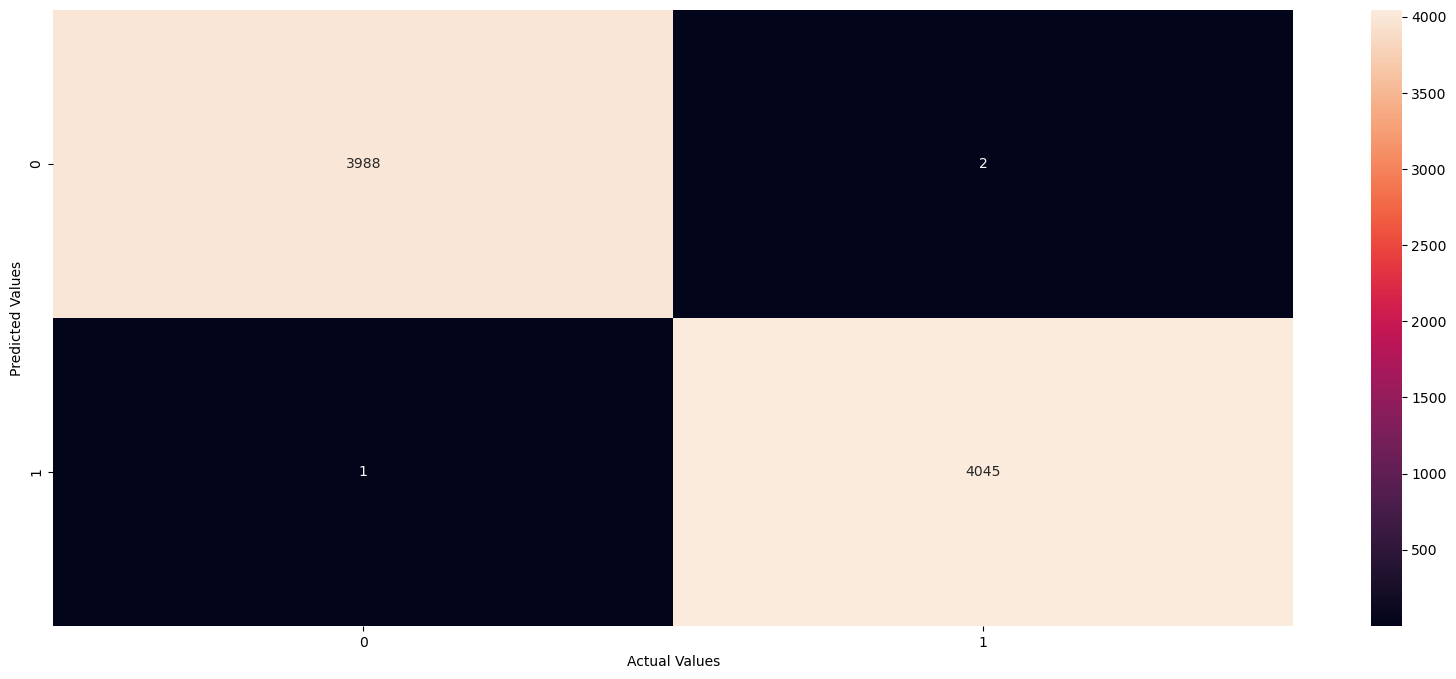

In [96]:
plt.figure(figsize=(20, 8))
sb.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

#### Metrics Accuracy

In [97]:
from sklearn.metrics import accuracy_score

In [98]:
acc_score = accuracy_score(y_pred, y_test)
acc_score

0.9996266799402688

### Metric - Precision

In [99]:
from sklearn.metrics import precision_score

In [100]:
prec = precision_score(y_pred, y_test)
prec

0.9995058067704472

### Metric - Recall

In [101]:
from sklearn.metrics import recall_score

In [102]:
recall = recall_score(y_pred, y_test)
recall

0.9997528423133959

### Metric - F1_score

In [103]:
from sklearn.metrics import f1_score

In [104]:
f1 = f1_score(y_pred, y_test)
f1

0.9996293092796243

## PLOTTING DIFFERENT PLOTS TO SEE THE BEHAVIOUS OF THE DATASET

### Testing the dataset with other models to see the best fit model

In [137]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report

def predict_flood_occurrence(data, target_enn, test_size=0.2, random_state=40):
    """
    Predict flood occurrence using three different models.

    Parameters:
    - data (DataFrame or ndarray): Feature data.
    - labels (array-like): Labels indicating flood occurrence (1: Flood, 0: No Flood).
    - test_size (float): Proportion of data to use for testing.
    - random_state (int): Random state for reproducibility.

    Returns:
    - results (dict): Accuracy and classification report for each model.
    """
    # Step 1: Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Step 2: Initialize models
    models = {
        "RF_model": RandomForestClassifier(random_state=random_state),
        "SVC_model": SVC(kernel='linear', random_state=random_state),
        "KNN_model": KNeighborsClassifier(n_neighbors=5),
        "Ridge_model": RidgeClassifier(alpha=1.0),
        "XGBoost_model": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
    }
    
    results = {}

    # Step 3: Train and evaluate each model
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        # Predict
        y_pred = model.predict(X_test)
        # Evaluate
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        
        # Store the results
        results[model_name] = {
            "Accuracy": accuracy,
            "Classification Report": report
        }
            
    return results

# Predict and evaluate
results = predict_flood_occurrence(X, y)

# Display results
for model, metrics in results.items():
    print(f"Model: {model}")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print("Classification Report:")
    print(pd.DataFrame(metrics['Classification Report']).transpose())
    print()

     


C:\Users\mosakue\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\mosakue\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mosakue\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\mosakue\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:1223: DataConversionWarning: A column-vector y was passed when 

Model: RF_model
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score      support
0.0            0.999499  0.999749  0.999624  3989.000000
1.0            0.999753  0.999506  0.999629  4047.000000
accuracy       0.999627  0.999627  0.999627     0.999627
macro avg      0.999626  0.999628  0.999627  8036.000000
weighted avg   0.999627  0.999627  0.999627  8036.000000

Model: SVC_model
Accuracy: 0.99
Classification Report:
              precision    recall  f1-score      support
0.0            0.974340  0.999499  0.986759  3989.000000
1.0            0.999493  0.974055  0.986610  4047.000000
accuracy       0.986685  0.986685  0.986685     0.986685
macro avg      0.986917  0.986777  0.986685  8036.000000
weighted avg   0.987007  0.986685  0.986684  8036.000000

Model: KNN_model
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score      support
0.0            0.998748  1.000000  0.999374  3989.000000
1.0            1.000000  0.998765  0

C:\Users\mosakue\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

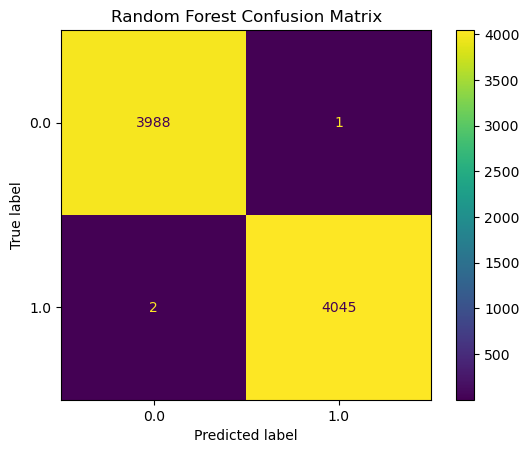

In [146]:
# Random Forest Classifier
random_state = 40
import matplotlib
import matplotlib.pyplot as plt
RF_model = RandomForestClassifier(random_state=random_state)
RF_model.fit(X_train, y_train)
y_pred_rf = RF_model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf) 
plt.title("Random Forest Confusion Matrix")

C:\Users\mosakue\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'SVC Confusion Matrix')

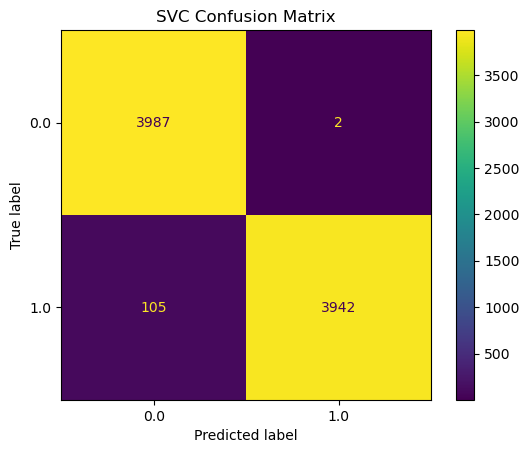

In [139]:
# Random Forest Classifier
random_state = 40
import matplotlib
import matplotlib.pyplot as plt
SVC_model = SVC(kernel='linear', random_state=random_state)
SVC_model.fit(X_train, y_train)
y_pred_SVC = SVC_model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_SVC) 
plt.title("SVC Confusion Matrix")

C:\Users\mosakue\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Text(0.5, 1.0, 'KNN Confusion Matrix')

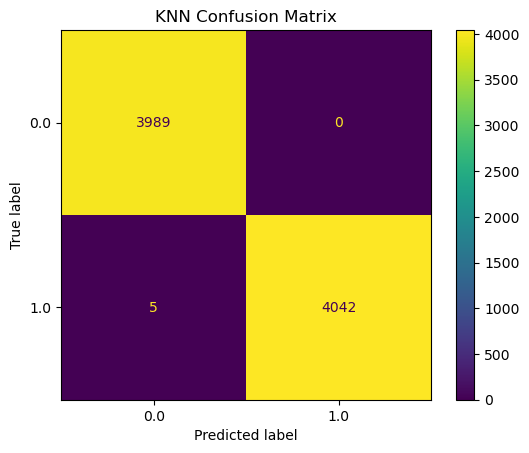

In [140]:
# Random Forest Classifier
random_state = 40
import matplotlib
import matplotlib.pyplot as plt
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)
y_pred_KNN = KNN_model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_KNN) 
plt.title("KNN Confusion Matrix")


C:\Users\mosakue\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:1223: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'Ridge Confusion Matrix')

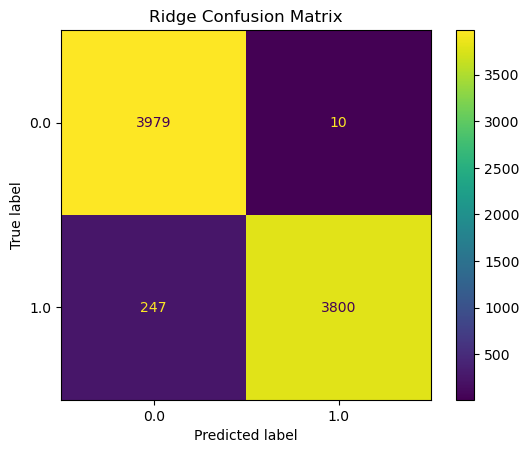

In [143]:
# Random Forest Classifier
random_state = 40
import matplotlib
import matplotlib.pyplot as plt
Ridge_model = RidgeClassifier(alpha=1.0)
Ridge_model.fit(X_train, y_train)
y_pred_Ridge = Ridge_model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_Ridge) 
plt.title("Ridge Confusion Matrix")

Text(0.5, 1.0, 'XGBoost Confusion Matrix')

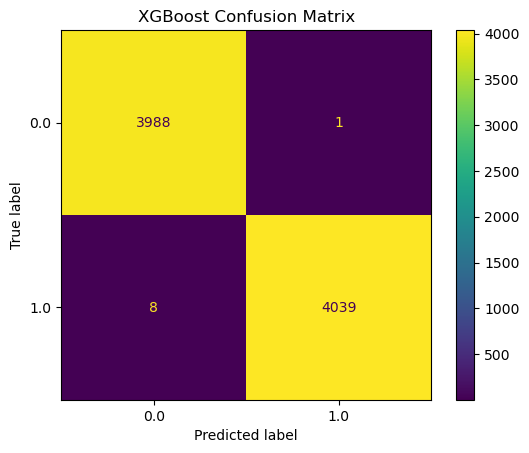

In [144]:
# Random Forest Classifier
random_state = 40
import matplotlib
import matplotlib.pyplot as plt
XGBoost_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
XGBoost_model.fit(X_train, y_train)
y_pred_XGBoost = XGBoost_model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_XGBoost) 
plt.title("XGBoost Confusion Matrix")
